<a href="https://colab.research.google.com/github/SBOlorunju/Excel-to-Python-Notebook/blob/main/EXcel_to_Python_Notebook__Project_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Template: Netflix Movies and TV shows


---



<br>

***Project structure:***


1.   Define the objective
2.   Import packages and data
3.   Explore and clean
4.   Analyze

**Objective:** 

        1. To determine the top 10 countries in Movies production on Netflix
          2. To determine the top 10 countries in shows production on Netflix
          3. To show the trend of Movies and shows over between 2011 and 2020


<br>

## **Objective**
---

*A brief description of the project objective/goals*

<br>

Questions to answer in the analysis:


1.   Question 1
2.   Question 2
3.   Question 3



In [ ]:
Question 1
Which countries are the top ten in movies production on Netflix?

Question 2
Which countries are the top ten in shows production on Netflix?

Question 3
What is the trend of movies and shows production on Netflix between 2011 and 2020?

<br><br>

## **Import packages and data**
---

Replace this text with information about your data source. You may want to include a link to the data source.

The goal is to make this notebook as clear as possible for our future self, other analysts and decision makers.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sbolorunju","key":"ec2cb1923725a6ef19ac1cf1271c3985"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 82.9MB/s]


In [7]:
! mkdir netflix

In [8]:
! unzip netflix-shows.zip -d netflix

Archive:  netflix-shows.zip
  inflating: netflix/netflix_titles.csv  


In [9]:
# Import data
Netflix_shows=pd.read_csv('/content/netflix/netflix_titles.csv')

In [10]:
Netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


<br><br>

## **Explore and Clean Data**
---
You can also include notes here. Feel free to also include text between code cells throughout the notebook.

In [11]:
# Perform common cleaning operations like checking for missing data, removing duplicates and splitting columns
Netflix_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [15]:
Netflix_shows=Netflix_shows.dropna()


In [17]:
Netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [12]:
Netflix_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<br><br>

## **Analysis**
---

In [ ]:
# Create summary tables, new variables, etc...
# Create charts

In [30]:
movies_netflix_movie= Netflix_shows[Netflix_shows['type']=='Movie']

In [31]:
movies_netflix_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


**Question 1**

In [32]:
chart_netflix_movies= movies_netflix_movie.groupby(['country']).size().sort_values(ascending=False)[0:10]

Text(0, 0.5, '')

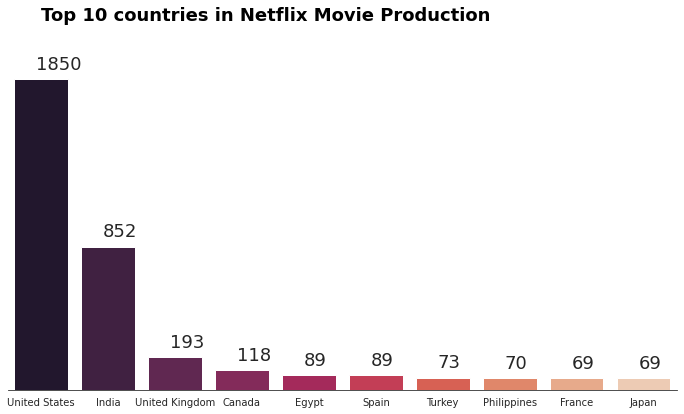

In [37]:
plt.figure (figsize= (12,6))
m=sns.barplot(x=chart_netflix_movies.index, y=chart_netflix_movies, palette='rocket')
m.text (0, 2200, 'Top 10 countries in Netflix Movie Production', fontsize=18, fontweight= 'bold', fontfamily='Ubuntu', color= 'black')
for i in ['top', 'left', 'right']:
    m.spines[i].set_visible(False)

for i in m.patches:
    m.text(i.get_x() + i.get_width()/2.5,
           i.get_height () + 60,
           round(i.get_height()),
           fontsize = '18' ,
           fontfamily= 'Ubuntu')
  

m.set (yticklabels=[])
plt.xlabel('')
plt.ylabel ('')

**Question 2**

Text(0, 0.5, '')

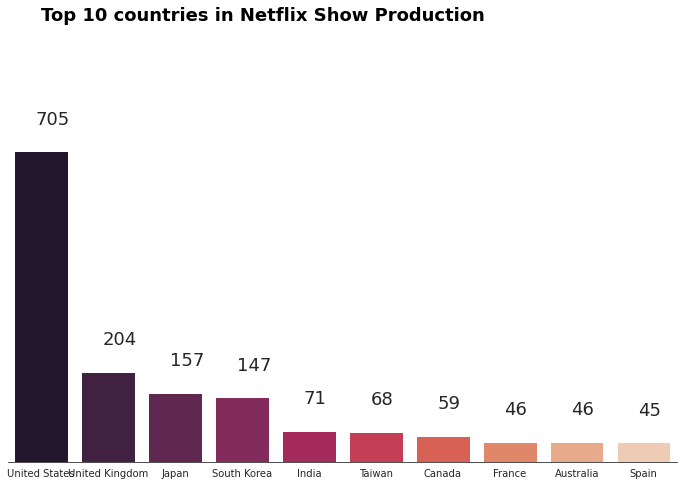

In [36]:
movies_netflix_shows= Netflix_shows[Netflix_shows['type']=='TV Show']
chart_netflix_show= movies_netflix_shows.groupby(['country']).size().sort_values(ascending=False)[0:10]
plt.figure (figsize= (12,6))
m=sns.barplot(x=chart_netflix_show.index, y=chart_netflix_show, palette='rocket')
m.text (0, 1000, 'Top 10 countries in Netflix Show Production', fontsize=18, fontweight= 'bold', fontfamily='Ubuntu', color= 'black')
for i in ['top', 'left', 'right']:
    m.spines[i].set_visible(False)

for i in m.patches:
    m.text(i.get_x() + i.get_width()/2.5,
           i.get_height () + 60,
           round(i.get_height()),
           fontsize = '18' ,
           fontfamily= 'Ubuntu')
  

m.set (yticklabels=[])
plt.xlabel('')
plt.ylabel ('')

**Question 3**

Text(0, 0.5, '')

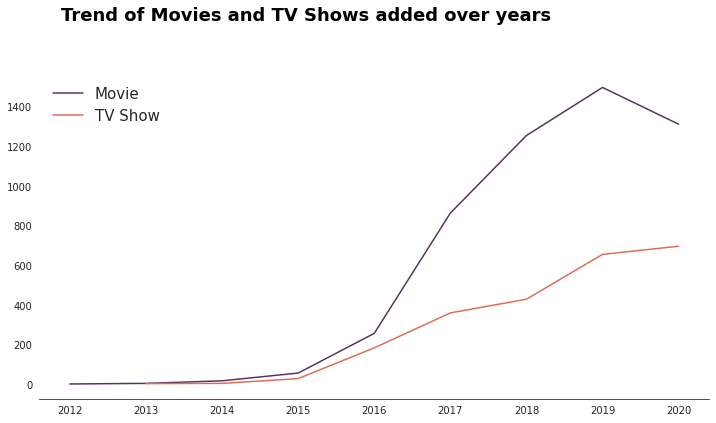

In [47]:
Netflix_shows['date_added'] = pd.to_datetime(Netflix_shows['date_added'])
Netflix_shows['year_added'] = Netflix_shows['date_added'].dt.year
index = [2014,2015,2016,2017,2018,2019,2020]

ts_Netflix_shows = Netflix_shows[Netflix_shows['year_added']>2011]
ts_Netflix_shows = ts_Netflix_shows[ts_Netflix_shows['year_added']<2021].groupby('type')['year_added'].value_counts().unstack().T

fig, ax = plt.subplots(1,1, figsize=(12,6))
fig.text(0.15,1,'Trend of Movies and TV Shows added over years', 
         fontsize=18, fontweight='bold', fontfamily='Ubuntu',color='black')

g1 = sns.lineplot(x=ts_Netflix_shows.index,y=ts_Netflix_shows['Movie'], color='#593262',label='Movie')
g2 = sns.lineplot(x=ts_Netflix_shows.index,y=ts_Netflix_shows['TV Show'], color='#db6e59',label='TV Show')

    
for i in ['top', 'left', 'right']:
    ax.spines[i].set_visible(False)
    
ax.legend(loc='upper left',frameon=False,prop={'size': 15, 'family': 'Ubuntu'})
plt.xlabel('')
plt.ylabel('')
